<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/reach_drainflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By Carli Beisel

Created on August 20, 2024

Purpose: Superimpose all Mason Creek gauge readings to determine lag & response time of drain.

## Compile streamflow data for all reaches

In [ ]:
## --------------- ##
## IMPORT PACKAGES ##
## --------------- ##

import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## ------------------------ ##
##  Major Reach Flow Files  ##
## ------------------------ ##
# main flow for each reach delineation (Qin/Qout)

solomon_highline = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Solomon-drain-at-highline.csv')

solomon_marble = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Solomon-Drain-at-marble-front.csv')

purdum_sweetwater = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Purdum-at-Sweetwater.csv')

purdum_phyllis = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Purdum-at-the-Phyllis.csv')

mason_phyllis = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-at-Madison.csv')

mason_marble = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-at-Ustick-and-Northside.csv')

mason_madison = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-Marble-front-Rd.csv')

mason_northside = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-at-Phyllis.csv')

mason_usgs = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/mason_usgs.csv')
mason_usgs.rename(columns={
    'X_00060_00003': 'Flow',
    'Date': 'Time'
}, inplace=True)

In [ ]:
## ------------------------ ##
##  Minor Reach Flow Files    ##
## ------------------------ ##
# minor flow for each reach delineation (feeders,laterals,etc.)

spill_100 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/100-Spill.csv')

east13_3_spill = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/13-3-East-Spill.csv')

spill_200 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/200-Spill.csv')

spill_400 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/400-spill.csv')

spill_500 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/500-spill.csv')

spill_8_26 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/8-26-Spill.csv')

bicandi = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Bicandi.csv')

mason_highline_spill = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Highline-spill-into-Mason.csv')

mason_feeder = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Feeder.csv')

noble = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Noble-Drain.csv')

mcdc = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/mason-Creek-Ditch-Company.csv')

In [ ]:
# Function to create a new DataFrame with daily averages
def create_gauge_df(df, gauge_name, time_column='timestamp', flow_column='flow'):
    df[time_column] = pd.to_datetime(df[time_column])
    df.set_index(time_column, inplace=True)
    df_daily = df.resample('D').mean()  # Resample by day and calculate the mean
    df_daily.reset_index(inplace=True)
    df_daily['Gauge'] = gauge_name
    df_daily = df_daily[['Gauge', time_column, flow_column]]
    df_daily.columns = ['Gauge', 'Date', 'Flow(cfs)']  # Rename columns
    return df_daily

# create a DataFrame for each gauge in Mason Drain
phyllis_df = create_gauge_df(mason_phyllis, 'Mason at Phyllis')
marble_df = create_gauge_df(mason_marble, 'Mason at Marble')
madison_df = create_gauge_df(mason_madison, 'Mason at Madison')
northside_df = create_gauge_df(mason_northside, 'Mason at Northside')
solomon_highline_df = create_gauge_df(solomon_highline, 'Solomon at Highline')
solomon_marble_df = create_gauge_df(solomon_marble, 'Solomon at Marble')
purdum_sweetwater_df = create_gauge_df(purdum_sweetwater, 'Purdum at Sweetwater')
purdum_phyllis_df = create_gauge_df(purdum_phyllis, 'Purdum at Phyllis')
spill_100_df = create_gauge_df(spill_100, '100 Spill')
east13_3_spill_df = create_gauge_df(east13_3_spill, '13-3 East Spill')
spill_200_df = create_gauge_df(spill_200, '200 Spill')
spill_400_df = create_gauge_df(spill_400, '400 Spill')
spill_500_df = create_gauge_df(spill_500, '500 Spill')
spill_8_26_df = create_gauge_df(spill_8_26, '8-26 Spill')
bicandi_df = create_gauge_df(bicandi, 'Bicandi')
mason_highline_spill_df = create_gauge_df(mason_highline_spill, 'Highline Spill into Mason')
mason_feeder_df = create_gauge_df(mason_feeder, 'Mason Feeder')
noble_df = create_gauge_df(noble, 'Noble Drain')
mcdc_df = create_gauge_df(mcdc, 'Mason Creek Ditch Company')

# Combine all DataFrames into a single DataFrame
ethos_df = pd.concat([phyllis_df, marble_df, madison_df, northside_df,
                      purdum_phyllis_df, purdum_sweetwater_df,
                      solomon_marble_df, solomon_highline_df, spill_100_df,
                      east13_3_spill_df, spill_200_df, spill_400_df, spill_500_df,
                      spill_8_26_df, bicandi_df, mason_highline_spill_df,
                      mason_feeder_df, noble_df, mcdc_df])

# Remove time from the Date column
ethos_df['Date'] = pd.to_datetime(ethos_df['Date']).dt.date

In [ ]:
## -------------------- ##
##  Mason USGS Gauge    ##
## -------------------- ##

# Prepare the USGS DataFrame similarly
mason_usgs = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/mason_usgs.csv')
mason_usgs.rename(columns={'X_00060_00003': 'Flow(cfs)'}, inplace=True)

# Remove time from the Date column
mason_usgs['Gauge'] = 'USGS'
mason_usgs['Date'] = pd.to_datetime(mason_usgs['Date']).dt.date

In [ ]:
## --------------------------------- ##
# Concatenate the USGS & Ethos gauges
## --------------------------------- ##

# continuous data
continuous_flow_df = pd.concat([ethos_df, mason_usgs])
continuous_flow_df['Date'] = pd.to_datetime(continuous_flow_df['Date'])
continuous_flow_df.to_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/final_continuous_flow.csv', index=False)

## Continuous Plots of Streamflow

In [2]:
## --------------- ##
## IMPORT PACKAGES ##
## --------------- ##

import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ------------------------ #
# Define Start/End Date
# ------------------------ #

# Define the timeframe for figures
start_date = '2024-03-01'
end_date = '2024-10-25'

df = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/final_continuous_flow.csv')

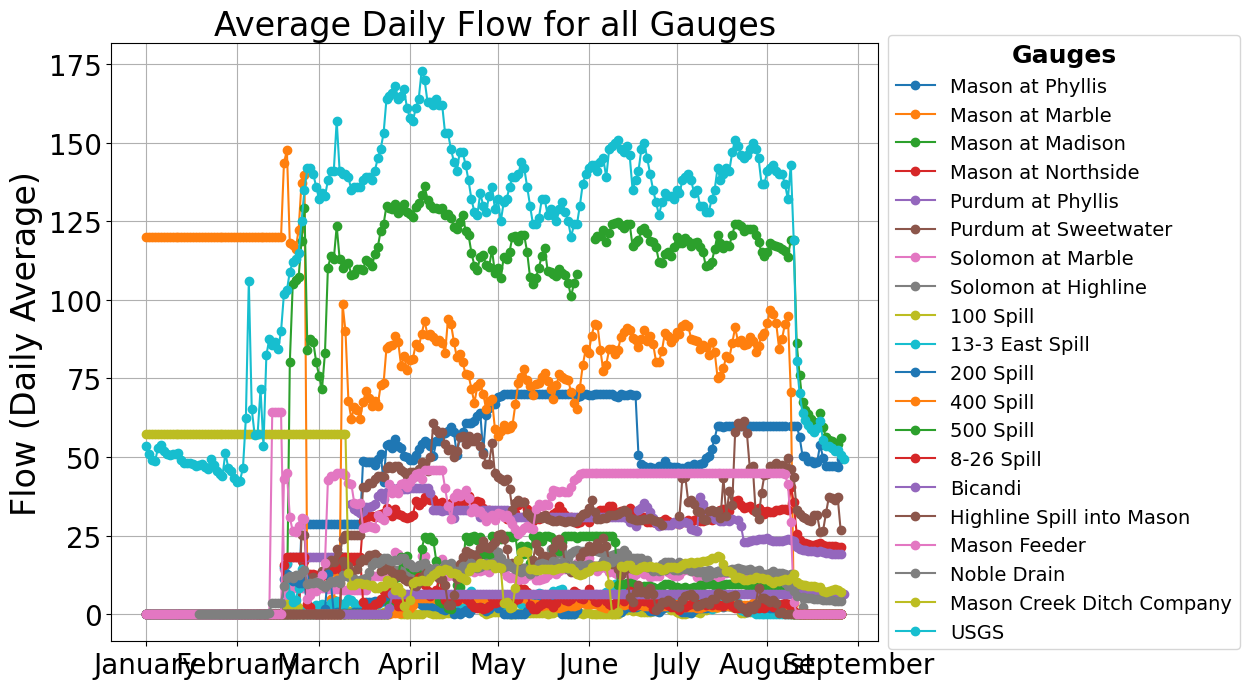

In [8]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

color_palette = ['#4C934C', '#2292A4','#63264A', '#9B3D12']

plt.figure(figsize=(14, 7))

for gauge in filtered_df['Gauge'].unique():
    gauge_data = filtered_df[filtered_df['Gauge'] == gauge]
    plt.plot(gauge_data['Date'], gauge_data['Flow(cfs)'], marker='o', label=gauge)

plt.title('Average Daily Flow for all Gauges', fontsize = 24)
plt.xlabel('')
plt.ylabel('Flow (Daily Average)', fontsize = 24)
plt.legend()
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/all_flow.png', dpi=300, bbox_inches='tight')
plt.show()

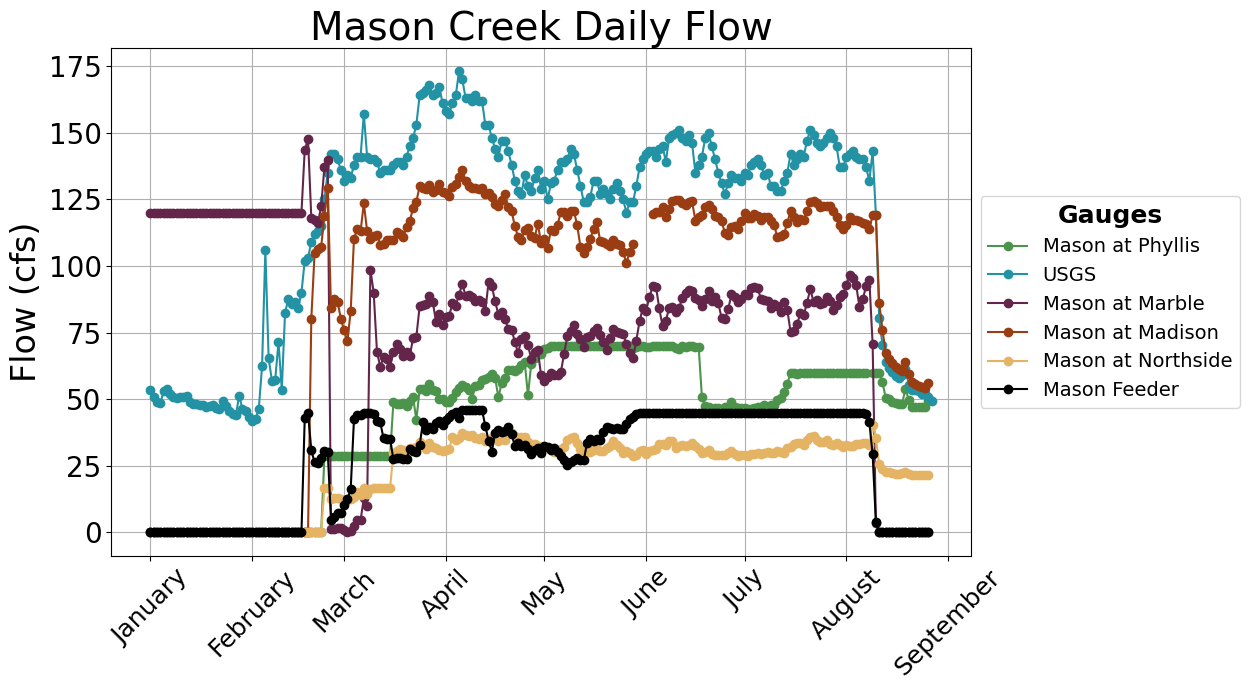

In [9]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# MASON GAUGES ONLY

selected_gauges = ['Mason at Phyllis', 'USGS', 'Mason at Marble','Mason at Madison', 'Mason at Northside', 'Mason Feeder']

color_palette = ['#4C934C', '#2292A4','#63264A', '#9B3D12', '#E4B363','black']

# Filter the DataFrame for the selected gauges
filtered_gauge_df = filtered_df[filtered_df['Gauge'].isin(selected_gauges)]

# Plotting
plt.figure(figsize=(14, 7))

for i, gauge in enumerate(selected_gauges):
    gauge_data = filtered_gauge_df[filtered_gauge_df['Gauge'] == gauge]
    plt.plot(gauge_data['Date'], gauge_data['Flow(cfs)'], marker='o', color=color_palette[i % len(color_palette)], label=gauge)

plt.title('Mason Creek Daily Flow', fontsize=28)
plt.xlabel('')
plt.ylabel('Flow (cfs)', fontsize=24)
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

plt.xticks(fontsize=18)
plt.xticks(rotation=45)
plt.yticks(fontsize=20)

legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/mason_flow.png', dpi=300, bbox_inches='tight')
plt.show()

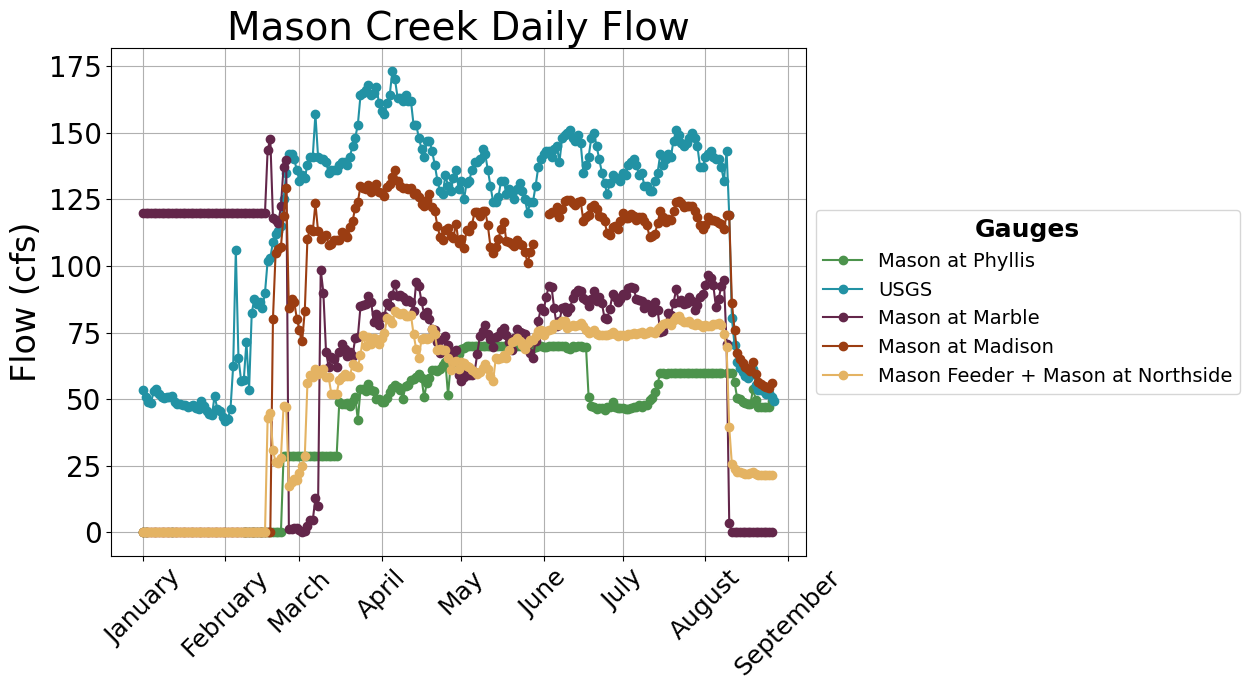

In [10]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# MASON GAUGES ONLY [Mason Feeder added to Mason at Northside]
# Define selected gauges and color palette
selected_gauges = ['Mason at Phyllis', 'USGS', 'Mason at Marble', 'Mason at Madison', 'Mason Feeder + Mason at Northside']
color_palette = ['#4C934C', '#2292A4', '#63264A', '#9B3D12', '#E4B363', 'black']

# Filter and aggregate data
filtered_gauge_df = filtered_df[filtered_df['Gauge'].isin(['Mason at Northside', 'Mason Feeder'])]

# Create aggregated data for "Mason Feeder + Mason at Northside"
aggregated_data = (
    filtered_gauge_df[filtered_gauge_df['Gauge'].isin(['Mason at Northside', 'Mason Feeder'])]
    .groupby('Date')['Flow(cfs)']
    .sum()
    .reset_index()
)
aggregated_data['Gauge'] = 'Mason Feeder + Mason at Northside'

# Combine aggregated data with other gauge data
remaining_gauge_data = filtered_df[
    filtered_df['Gauge'].isin(['Mason at Phyllis', 'USGS', 'Mason at Marble', 'Mason at Madison'])
]
combined_data = pd.concat([remaining_gauge_data, aggregated_data])

# Plotting
plt.figure(figsize=(14, 7))

# Loop through and plot each gauge
for i, gauge in enumerate(selected_gauges):
    gauge_data = combined_data[combined_data['Gauge'] == gauge]
    plt.plot(gauge_data['Date'], gauge_data['Flow(cfs)'], marker='o', color=color_palette[i % len(color_palette)], label=gauge)

# Customize the plot
plt.title('Mason Creek Daily Flow', fontsize=28)
plt.xlabel('')
plt.ylabel('Flow (cfs)', fontsize=24)
plt.grid(True)

# Set x-axis formatting
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=20)

# Add legend
legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

# Finalize and save
plt.tight_layout(rect=[0, 0, 0.9, 1])
#plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/mason_flow.png', dpi=300, bbox_inches='tight')
plt.show()

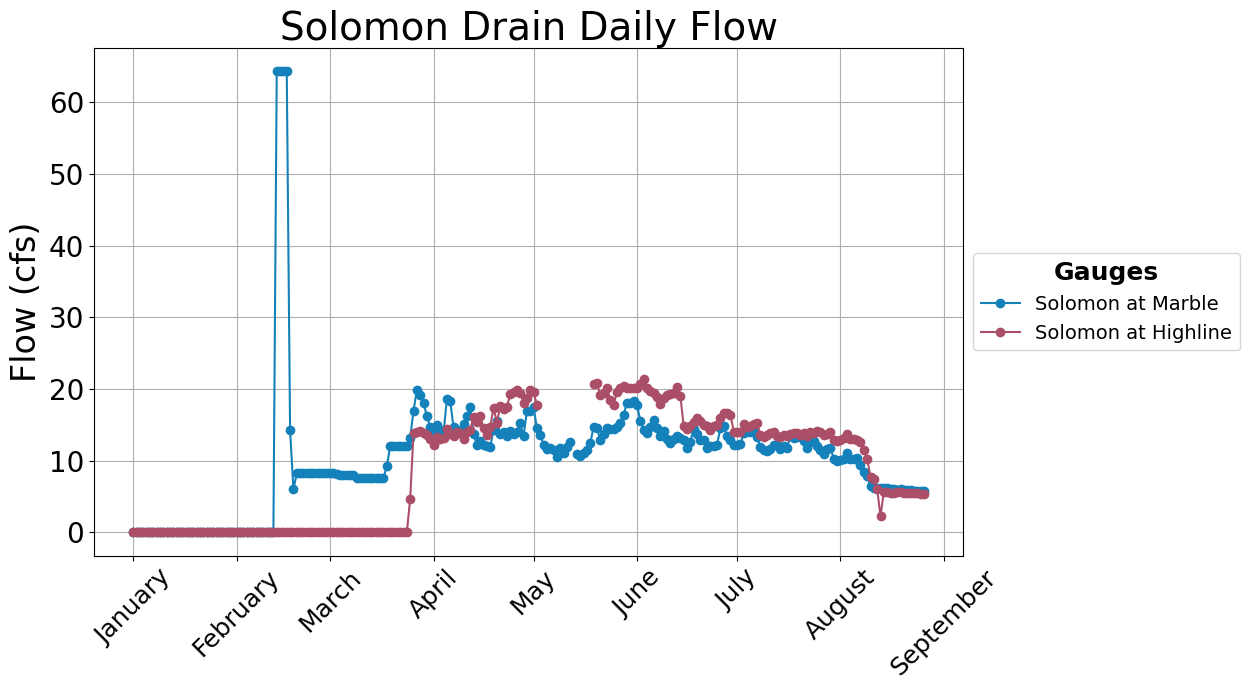

In [ ]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# SOLOMON GAUGES ONLY

selected_gauges = ['Solomon at Marble', 'Solomon at Highline']

color_palette = ['#1481BA', '#AB4E68']

# Filter the DataFrame for the selected gauges
filtered_gauge_df = filtered_df[filtered_df['Gauge'].isin(selected_gauges)]

# Plotting
plt.figure(figsize=(14, 7))

for i, gauge in enumerate(selected_gauges):
    gauge_data = filtered_gauge_df[filtered_gauge_df['Gauge'] == gauge]
    plt.plot(gauge_data['Date'], gauge_data['Flow(cfs)'], marker='o', color=color_palette[i % len(color_palette)], label=gauge)

plt.title('Solomon Drain Daily Flow', fontsize=28)
plt.xlabel('')
plt.ylabel('Flow (cfs)', fontsize=24)
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

plt.xticks( fontsize=18)
plt.xticks(rotation=45)
plt.yticks(fontsize=20)


legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/solomon_flow.png', dpi=300, bbox_inches='tight')
plt.show()

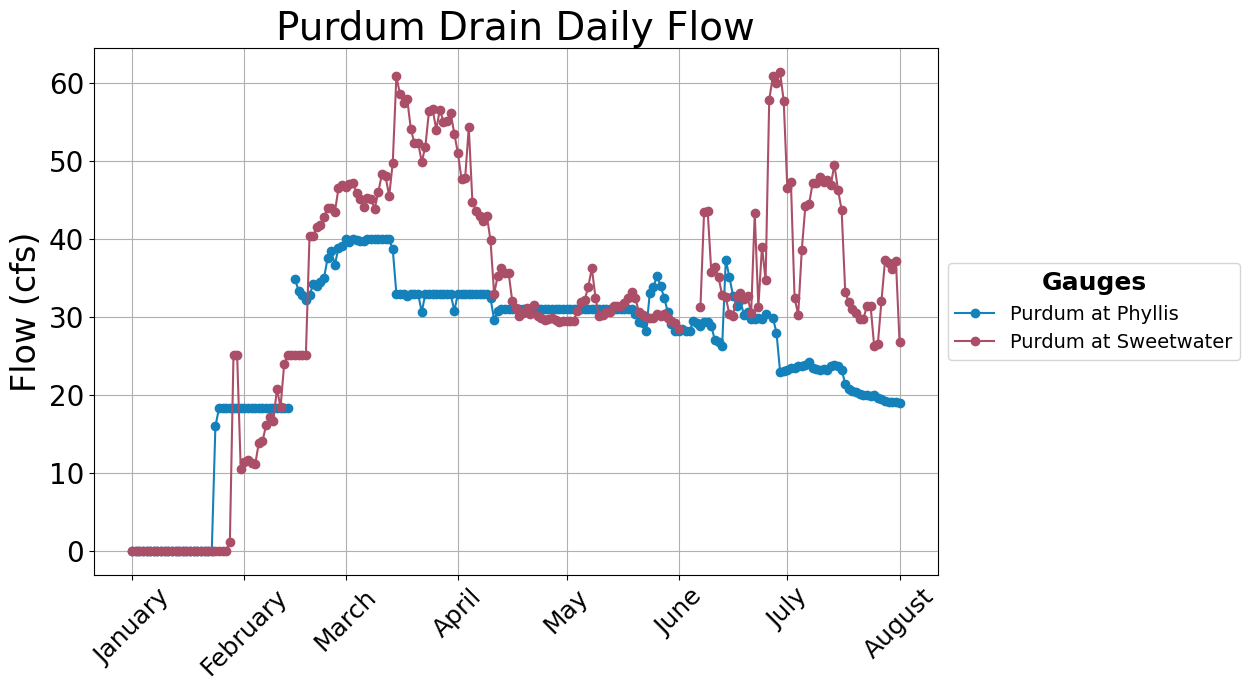

<Figure size 640x480 with 0 Axes>

In [ ]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# PURDUM GAUGES ONLY

selected_gauges = ['Purdum at Phyllis', 'Purdum at Sweetwater']

color_palette = ['#1481BA', '#AB4E68']

# Filter the DataFrame for the selected gauges
filtered_gauge_df = filtered_df[filtered_df['Gauge'].isin(selected_gauges)]

# Plotting
plt.figure(figsize=(14, 7))

for i, gauge in enumerate(selected_gauges):
    gauge_data = filtered_gauge_df[filtered_gauge_df['Gauge'] == gauge]
    plt.plot(gauge_data['Date'], gauge_data['Flow(cfs)'], marker='o', color=color_palette[i % len(color_palette)], label=gauge)

plt.title('Purdum Drain Daily Flow', fontsize=28)
plt.xlabel('')
plt.ylabel('Flow (cfs)', fontsize=24)
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

plt.xticks( fontsize=18)
plt.xticks(rotation=45)
plt.yticks(fontsize=20)


legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/solomon_flow.png', dpi=300, bbox_inches='tight')
plt.show()
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/purdum_flow.png', dpi=300, bbox_inches='tight')
plt.show()

## Calculate Cumulative Monthly Discharge & Define Inflows / Outflows

In [11]:
# ----------------------------------------------- #
# Calculate the total volume of monthly flow (AF)
# ----------------------------------------------- #

df = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/final_continuous_flow.csv')

# Convert 'Date' to datetime and keep necessary columns
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df[['Gauge', 'Date', 'Flow(cfs)']].dropna(subset=['Date', 'Flow(cfs)'])  # Drop rows with NaN in Date or Flow(cfs)

# Ensure 'Flow(cfs)' is numeric
df['Flow(cfs)'] = pd.to_numeric(df['Flow(cfs)'], errors='coerce')
df = df.dropna(subset=['Flow(cfs)'])  # Drop rows with NaN in Flow(cfs) after conversion

# Initialize list to store monthly cumulative flows for each gauge
monthly_cumulative_flow = []

# Group by 'Gauge' and process each gauge's data separately
for gauge, gauge_data in df.groupby('Gauge'):
    # Sort data by 'Date', set 'Date' as index, and keep only 'Flow(cfs)' column
    gauge_data = gauge_data.sort_values(by='Date').set_index('Date')[['Flow(cfs)']]

    # Resample to daily frequency and calculate daily volume
    gauge_daily = gauge_data.resample('D').mean()
    gauge_daily['Daily_Volume'] = gauge_daily['Flow(cfs)'] * 86400  # Convert flow to daily volume in cubic feet

    # Fill any NaN in 'Daily_Volume' after resampling with 0
    gauge_daily['Daily_Volume'].fillna(0, inplace=True)

    # Resample to get monthly cumulative volume in acre-feet
    gauge_monthly = gauge_daily['Daily_Volume'].resample('M').sum() / 43560  # Convert to acre-feet

    # Create DataFrame for this gauge's monthly data
    gauge_monthly_df = pd.DataFrame({
        'Gauge': gauge,
        'Month': gauge_monthly.index,
        'Cumulative Flow (AF)': gauge_monthly.values
    })

    # Append to the list
    monthly_cumulative_flow.append(gauge_monthly_df)

monthly_df = pd.concat(monthly_cumulative_flow, ignore_index=True)
monthly_df.to_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/monthly_flow.csv', index=False)

<ipython-input-11-792949f91476>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gauge_daily['Daily_Volume'].fillna(0, inplace=True)
<ipython-input-11-792949f91476>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gauge_monthly = gauge_daily['Daily_Volume'].resample('M').sum() / 43560  # Convert to acre-feet
<ipython-input-11-792949f91476>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.

In [15]:
# --------------------------------- #
# Calculate Reach Inflows & Outflows
# --------------------------------- #

df = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/monthly_flow.csv')
df['Month'] = pd.to_datetime(df['Month']).dt.to_period('M').dt.strftime('%Y-%m') # convert 'Month' column to datetime

final_df = []

# ------ #
# Reach 1
# ------ #
qin_r1 = df[df['Gauge'] == "Mason at Phyllis"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin'})
qout_r1 = df[df['Gauge'] == "Mason at Madison"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout'})
reach_1_df = pd.merge(qin_r1, qout_r1, on='Month', how='inner')
reach_1_df.insert(0, 'Reach', 'Reach 1')
final_df = reach_1_df

# ------ #
# Reach 2
# ------ #
qin_r2_madison = df[df['Gauge'] == "Mason at Madison"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_Mason'})
qin_r2_purdum = df[df['Gauge'] == "Purdum at Sweetwater"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_Purdum'})
qout_r2_northside = df[df['Gauge'] == "Mason at Northside"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout_Northside'})
qout_r2_feeder = df[df['Gauge'] == "Mason Feeder"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout_Feeder'})

# Qin
qin_r2 = pd.merge(qin_r2_madison, qin_r2_purdum, on='Month', how='inner')
qin_r2['Qin'] = qin_r2['Qin_Mason'] + qin_r2['Qin_Purdum']
qin_r2 = qin_r2[['Month', 'Qin']]

# Qout
qout_r2 = pd.merge(qout_r2_northside, qout_r2_feeder, on='Month', how='inner')
qout_r2['Qout'] = qout_r2['Qout_Northside'] + qout_r2['Qout_Feeder'] #MASON FEEDER ADDED TO MASON AT NORTHSIDE
qout_r2 = qout_r2[['Month', 'Qout']]

# Merge Qin and Qout
reach_2_df = pd.merge(qin_r2, qout_r2, on='Month', how='inner')
reach_2_df.insert(0, 'Reach', 'Reach 2')
final_df = pd.concat([final_df, reach_2_df], ignore_index=True)

# ------ #
# Reach 3
# ------ #
# Define Qin gauges for Reach 3
qin_r3_northside = df[df['Gauge'] == "Mason at Northside"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_Northside'})
qin_r3_8_26_spill = df[df['Gauge'] == "8-26 Spill"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_8_26_Spill'})
qin_r3_high_line_spill = df[df['Gauge'] == "Highline Spill into Mason"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_High_Line_Spill'})
qin_r3_100_spill = df[df['Gauge'] == "100 Spill"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_100_Spill'})
qin_r3_noble_drain = df[df['Gauge'] == "Noble Drain"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_Noble_Drain'})
qout_r3_mason_feeder = df[df['Gauge'] == "Mason Feeder"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout_Mason_Feeder'})

# Qin
qin_r3 = pd.merge(qin_r3_northside, qin_r3_8_26_spill, on='Month', how='inner')
qin_r3 = pd.merge(qin_r3, qin_r3_high_line_spill, on='Month', how='inner')
qin_r3 = pd.merge(qin_r3, qin_r3_100_spill, on='Month', how='inner')
qin_r3 = pd.merge(qin_r3, qin_r3_noble_drain, on='Month', how='inner')
qin_r3 = pd.merge(qin_r3,qout_r3_mason_feeder,on='Month', how='inner')

# SUBTRACTED MASON FEEDER FROM NORTHSIDE
qin_r3['Qin'] = qin_r3['Qin_Northside'] - qin_r3 ['Qout_Mason_Feeder'] + qin_r3['Qin_8_26_Spill'] + qin_r3['Qin_High_Line_Spill'] + qin_r3['Qin_100_Spill'] + qin_r3['Qin_Noble_Drain']
qin_r3 = qin_r3[['Month', 'Qin']]

# Qout
qout_r3_marble_front = df[df['Gauge'] == "Mason at Marble"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout_Marble_Front'})
qout_r3_mason_creek_ditch = df[df['Gauge'] == "Mason Creek Ditch Company"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout_Mason_Creek_Ditch'})

# Merge Qout components
qout_r3 = pd.merge(qout_r3_marble_front, qout_r3_mason_creek_ditch, on='Month', how='inner')

# Calculate total Qout
qout_r3['Qout'] = qout_r3['Qout_Marble_Front'] + qout_r3['Qout_Mason_Creek_Ditch']
qout_r3 = qout_r3[['Month', 'Qout']]

# Merge Qin and Qout
reach_3_df = pd.merge(qin_r3, qout_r3, on='Month', how='inner')
reach_3_df.insert(0, 'Reach', 'Reach 3')
final_df = pd.concat([final_df, reach_3_df], ignore_index=True)

# ------ #
# Reach 4
# ------ #
qin_r4_marble = df[df['Gauge'] == "Mason at Marble"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_Marble'})
qin_r4_solomon = df[df['Gauge'] == "Solomon at Marble"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_Solomon'})
qin_r4_400_spill = df[df['Gauge'] == "400 Spill"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_400_Spill'})

# Qin
qin_r4 = qin_r4_marble
qin_r4 = pd.merge(qin_r4, qin_r4_solomon, on='Month', how='inner')
qin_r4 = pd.merge(qin_r4, qin_r4_400_spill, on='Month', how='inner')

qin_r4['Qin'] = qin_r4[['Qin_Marble', 'Qin_Solomon', 'Qin_400_Spill']].sum(axis=1)
qin_r4 = qin_r4[['Month', 'Qin']]

# Qout
qout_r4_bicandi = df[df['Gauge'] == "Bicandi"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout_Bicandi'})
qout_r4_usgs = df[df['Gauge'] == "USGS"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout_USGS'})

qout_r4 = pd.merge(qout_r4_bicandi, qout_r4_usgs, on='Month', how='inner')

qout_r4['Qout'] = qout_r4[['Qout_Bicandi', 'Qout_USGS']].sum(axis=1)
qout_r4 = qout_r4[['Month', 'Qout']]

# Merge Qin and Qout
reach_4_df = pd.merge(qin_r4, qout_r4, on='Month', how='inner')
reach_4_df.insert(0, 'Reach', 'Reach 4')
final_df = pd.concat([final_df, reach_4_df], ignore_index=True)


# ------------ #
# Solomon Reach
# ------------ #

#Qin
qin_solomon = df[df['Gauge'] == "Solomon at Highline"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin'})

#Qout
qout_solomon = df[df['Gauge'] == "Solomon at Marble"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout'})

# Merge Qin and Qout
solomon_reach_df = pd.merge(qin_solomon, qout_solomon, on='Month', how='inner')
solomon_reach_df.insert(0, 'Reach', 'Solomon Reach')
final_df = pd.concat([final_df, solomon_reach_df], ignore_index=True)

# ------------ #
# Purdum Reach
# ------------ #

# Qin
qin_purdum = df[df['Gauge'] == "Purdum at Phyllis"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin'})

# Qout
qout_purdum = df[df['Gauge'] == "Purdum at Sweetwater"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout'})

# Merge Qin and Qout
purdum_reach_df = pd.merge(qin_purdum, qout_purdum, on='Month', how='inner')
purdum_reach_df.insert(0, 'Reach', 'Purdum Reach')
final_df = pd.concat([final_df, purdum_reach_df], ignore_index=True)


# ------------ #
# Noble Reach
# ------------ #

qin_noble_13_3 = df[df['Gauge'] == "13-3 East Spill"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_13_3'})
qin_noble_200 = df[df['Gauge'] == "200 Spill"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_noble_200'})

# Qin
qin_noble = pd.merge(qin_noble_13_3, qin_noble_200 , on='Month', how='inner')
qin_noble['Qin'] = qin_noble['Qin_13_3'] + qin_noble['Qin_noble_200']
qin_noble = qin_noble[['Month', 'Qin']]

# Qout
qout_noble = df[df['Gauge'] == "Noble Drain"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout'})

noble_reach_df = pd.merge(qin_noble, qout_noble, on='Month', how='inner')
noble_reach_df.insert(0, 'Reach', 'Noble Reach')
final_df = pd.concat([final_df, noble_reach_df], ignore_index=True)

final_df.to_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/final_monthly_flow.csv', index=False)

## Plot of Change in Flow

In [18]:
## --------------- ##
## IMPORT PACKAGES ##
## --------------- ##

import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# ---------------------------- #
# Calculate Reach Gains/Losses
# --------------------------- #
def calculate_flow_difference(df):
    """
    Calculate the flow difference (Qout - Qin) in acre-feet (AF) for each Gauge at each Month.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Gauge', 'Month', 'Qin', and 'Qout' columns.

    Returns:
    pd.DataFrame: DataFrame with an additional 'Flow Difference (AF)' column.
    """
    # Ensure 'Qin' and 'Qout' are numeric
    df['Qin'] = pd.to_numeric(df['Qin'], errors='coerce')
    df['Qout'] = pd.to_numeric(df['Qout'], errors='coerce')

    # Calculate the flow difference in AF
    df['Flow Difference (AF)'] = df['Qout'] - df['Qin']

    return df
final_df = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/final_monthly_flow.csv')

# Calculate the Flow Difference
final_df_with_difference = calculate_flow_difference(final_df)
final_df_with_difference['Month'] = pd.PeriodIndex(final_df_with_difference['Month'], freq='M').astype(str)

# convert from AF to KAF
final_df_with_difference['Flow Difference (KAF)'] = final_df_with_difference['Flow Difference (AF)'] / 1000
final_df_with_difference.to_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/final_monthly_flow.csv', index=False)

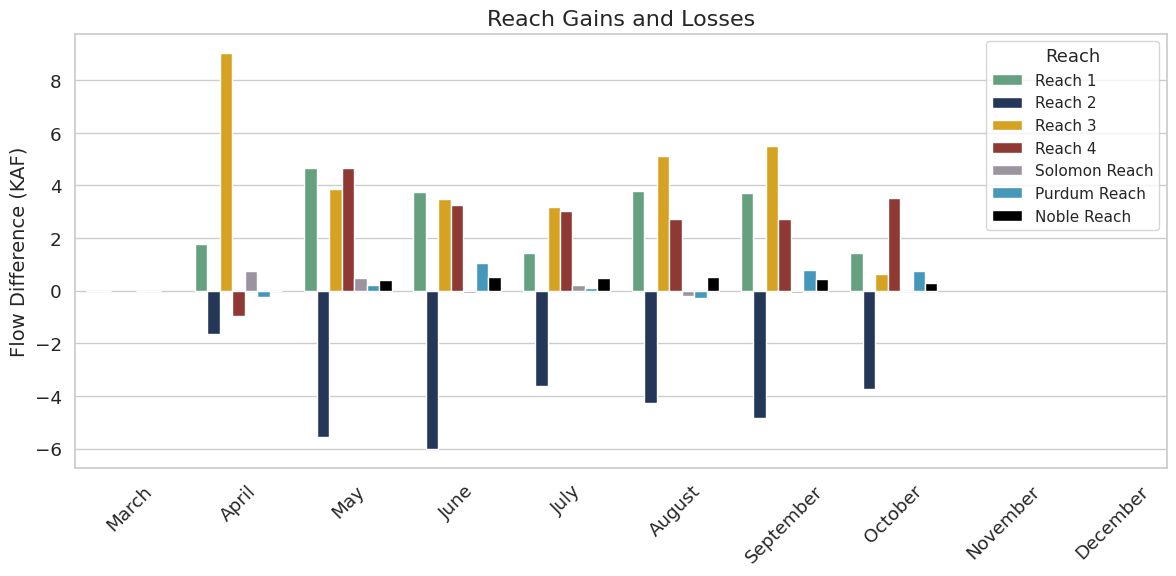

In [22]:
# ------------------------- #
# Plot of Reach Gains/Losses
# ------------------------- #

final_df_with_difference['Month'] = pd.to_datetime(final_df_with_difference['Month'], format='%Y-%m')
final_df_with_difference['Month'] = final_df_with_difference['Month'].dt.strftime('%B')  # Convert to month names

# filter out January and February
final_df_with_difference = final_df_with_difference[~final_df_with_difference['Month'].isin(['January', 'February'])]

sns.set(style="whitegrid", font_scale=1.2)

# custom colors
custom_palette = {
    "Reach 1": "#5CAB7D",
    "Reach 2": "#1D3461",
    "Reach 3": "#F3AF04",
    "Reach 4": "#9E2B25",
    "Purdum Reach": "#32A0CF",
    "Solomon Reach": "#9D91A3",
    "Noble Reach": 'black'
}


plt.figure(figsize=(12, 6))
sns.barplot(
    data=final_df_with_difference,
    x='Month', y='Flow Difference (KAF)', hue='Reach',
    palette=custom_palette,
    order=['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

# Plot labels
plt.title("Reach Gains and Losses", fontsize=16)
plt.xlabel("")
plt.ylabel("Flow Difference (KAF)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Reach", title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()